In [3]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization,Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint 
from keras import regularizers, optimizers
import numpy as np
from matplotlib import pyplot
from keras.layers import LeakyReLU
from tensorflow.keras.optimizers import Adam


In [4]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
x_val =  x_test[5000:]
y_val =  y_test[5000:]
x_test = x_test[:5000]
y_test = y_test[:5000]

170508288/170498071 [==============================] - 23s 0us/step


In [5]:
mean = np.mean(x_train,axis = (0,1,2,3))
std = np.std(x_train,axis = (0,1,2,3))
x_train = (x_train - mean)/(std+1e-7)
x_test = (x_test - mean)/(std+1e-7)
x_val = (x_val - mean)/(std+1e-7)

In [6]:
num_classes = 10
y_train = np_utils.to_categorical(y_train,num_classes=num_classes)
y_test = np_utils.to_categorical(y_test,num_classes=num_classes)
y_val = np_utils.to_categorical(y_val,num_classes=num_classes)
x_train.shape

(50000, 32, 32, 3)

In [32]:
model = Sequential()

# CONV 1
model.add(Conv2D(filters = 64,kernel_size=3,padding = "same",input_shape = (32,32,3),kernel_regularizer=regularizers.l2(0.0001)))
model.add(Activation('relu'))
model.add(BatchNormalization())

# CONV 2
model.add(Conv2D(filters = 64,kernel_size=3,padding = "same",kernel_regularizer=regularizers.l2(0.0001)))
model.add(Activation('relu'))
model.add(BatchNormalization())

# POOL + DROP
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.3))

# CONV 3
model.add(Conv2D(filters = 128,kernel_size=3,padding = "same",kernel_regularizer=regularizers.l2(0.0001)))
model.add(Activation('relu'))
model.add(BatchNormalization())

# CONV 4
model.add(Conv2D(filters = 128,kernel_size=3,padding = "same",kernel_regularizer=regularizers.l2(0.0001)))
model.add(Activation('relu'))
model.add(BatchNormalization())

# CONV 4
model.add(Conv2D(filters = 128,kernel_size=3,padding = "same",kernel_regularizer=regularizers.l2(0.0001)))
model.add(Activation('relu'))
model.add(BatchNormalization())

# POOL + DROP
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.3))

# CONV 5 
model.add(Conv2D(filters = 256,kernel_size=3,padding = "same",kernel_regularizer=regularizers.l2(0.0001)))
model.add(Activation('relu'))
model.add(BatchNormalization())

# CONV 6
model.add(Conv2D(filters = 256,kernel_size=3,padding = "same",kernel_regularizer=regularizers.l2(0.0001)))
model.add(Activation('relu'))
model.add(BatchNormalization())

# CONV 7
model.add(Conv2D(filters = 256,kernel_size=3,padding = "same",kernel_regularizer=regularizers.l2(0.0001)))
model.add(Activation('relu'))
model.add(BatchNormalization())

# NN
model.add(Flatten())

model.add(Dense(1024))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dense(1024))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dense(10,activation = "softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
activation (Activation)      (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0

In [41]:
model = Sequential()

# CONV 1
model.add(Conv2D(filters = 64,kernel_size=3,padding = "same",input_shape = (32,32,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())


# CONV 2
model.add(Conv2D(filters = 64,kernel_size=3,padding = "same"))
model.add(Activation('relu'))
model.add(BatchNormalization())


# POOL + DROP
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.3))

# CONV 3
model.add(Conv2D(filters = 128,kernel_size=3,padding = "same"))
model.add(Activation('relu'))
model.add(BatchNormalization())


# CONV 4
model.add(Conv2D(filters = 128,kernel_size=3,padding = "same"))
model.add(Activation('relu'))
model.add(BatchNormalization())


# CONV 4
model.add(Conv2D(filters = 128,kernel_size=3,padding = "same"))
model.add(Activation('relu'))
model.add(BatchNormalization())

# POOL + DROP
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.3))

# CONV 5 
model.add(Conv2D(filters = 256,kernel_size=3,padding = "same"))
model.add(Activation('relu'))
model.add(BatchNormalization())

# CONV 6
model.add(Conv2D(filters = 256,kernel_size=3,padding = "same"))
model.add(Activation('relu'))
model.add(BatchNormalization())

# CONV 7
model.add(Conv2D(filters = 256,kernel_size=3,padding = "same"))
model.add(Activation('relu'))
model.add(BatchNormalization())

#POOL + DROP
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))


# NN
model.add(Flatten())

#model.add(Dense(1024))
#model.add(Activation('relu'))


model.add(Dense(10,activation = "softmax"))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_36 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
activation_37 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 64)       

In [42]:
batch_size = 128
epochs = 125
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, save_best_only=True)
optimizer = Adam(learning_rate=0.0001,decay=1e-6)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

datagen = ImageDataGenerator(rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True, vertical_flip=False)
datagen.fit(x_train)

In [43]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size), callbacks=[checkpointer], 
                              steps_per_epoch=x_train.shape[0] // batch_size, epochs=epochs, verbose=2, validation_data=(x_val, y_val))

Epoch 1/125
390/390 - 603s - loss: 2.4865 - accuracy: 0.3145 - val_loss: 2.6060 - val_accuracy: 0.1820

Epoch 00001: val_loss improved from inf to 2.60605, saving model to model.weights.best.hdf5
Epoch 2/125
390/390 - 601s - loss: 1.7447 - accuracy: 0.4254 - val_loss: 1.6934 - val_accuracy: 0.4082

Epoch 00002: val_loss improved from 2.60605 to 1.69340, saving model to model.weights.best.hdf5
Epoch 3/125
390/390 - 601s - loss: 1.5513 - accuracy: 0.4924 - val_loss: 1.9733 - val_accuracy: 0.3990

Epoch 00003: val_loss did not improve from 1.69340
Epoch 4/125
390/390 - 600s - loss: 1.4198 - accuracy: 0.5313 - val_loss: 1.7935 - val_accuracy: 0.4390

Epoch 00004: val_loss did not improve from 1.69340
Epoch 5/125
390/390 - 597s - loss: 1.3124 - accuracy: 0.5643 - val_loss: 1.6406 - val_accuracy: 0.5078

Epoch 00005: val_loss improved from 1.69340 to 1.64057, saving model to model.weights.best.hdf5
Epoch 6/125
390/390 - 599s - loss: 1.2253 - accuracy: 0.5927 - val_loss: 1.6843 - val_accuracy

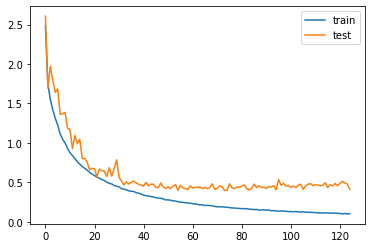

In [44]:
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='test') 
pyplot.legend()
pyplot.show()